In [1]:
import h5py
import os
import numpy as np
import sklearn.manifold
from MulticoreTSNE import MulticoreTSNE as TSNE
import matplotlib.pyplot as plt

def load_embeddings(path):
    f = h5py.File(path, 'r')
    nemb = f['nemb'][:]
    f.close()
    return nemb[1:]


def load_vocab(path):
    vocab = []
    with open(path, 'r') as f:
        for line in f.readlines():
            split = line.split(' ')
            vocab.append((split[0].replace('\'', ''), int(split[1].rstrip())))
    # ignore UNK at position 0
    return vocab[1:]

def run_tsne(nemb, multicore=True):
    if multicore:
        tsne = TSNE(n_jobs=4)
    else:
        tsne = sklearn.manifold.TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, verbose=1)
    return tsne.fit_transform(nemb)

# path = '/home/jaan/fit/food2vec/2017-01-24'
path = '../sentence_word2vec/model_save'

# 104534 embedded vectors - unique recipes?
nemb = load_embeddings(os.path.join(path, 'embeddings.h5'))

# 2088 vocabs - unique ingredients
vocab = load_vocab(os.path.join(path, 'vocab.txt'))

# don't plot UNK at position 0
low_dim_embs = run_tsne(nemb.astype(np.float64), multicore=True)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 16724
[t-SNE] Computed conditional probabilities for sample 2000 / 16724
[t-SNE] Computed conditional probabilities for sample 3000 / 16724
[t-SNE] Computed conditional probabilities for sample 4000 / 16724
[t-SNE] Computed conditional probabilities for sample 5000 / 16724
[t-SNE] Computed conditional probabilities for sample 6000 / 16724
[t-SNE] Computed conditional probabilities for sample 7000 / 16724
[t-SNE] Computed conditional probabilities for sample 8000 / 16724
[t-SNE] Computed conditional probabilities for sample 9000 / 16724
[t-SNE] Computed conditional probabilities for sample 10000 / 16724
[t-SNE] Computed conditional probabilities for sample 11000 / 16724
[t-SNE] Computed conditional probabilities for sample 12000 / 16724
[t-SNE] Computed conditional probabilities for sample 13000 / 16724
[t-SNE] Computed conditional probabilities 

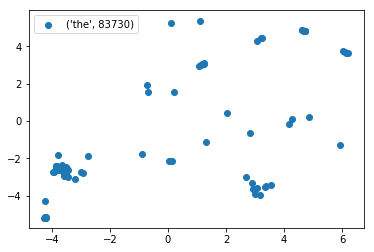

In [16]:
x, y = low_dim_embs[:100].T
plt.scatter(x,y)
plt.show()

In [13]:
print len(low_dim_embs)
print len(vocab)

16724
16724


In [14]:
for i, j in zip(low_dim_embs, vocab):
    print i, j

[-4.25307827 -5.17431502] ('the', 83730)
[ 1.23696642  3.08816451] ('of', 49563)
[ 4.68918423  4.80052546] ('one', 35579)
[ 1.22965631  3.07511923] ('and', 33267)
[ 1.18878828  3.04455874] ('in', 29691)
[ 1.15152245  3.02168877] ('a', 25387)
[ 1.0654746   2.94130438] ('to', 24914)
[ 4.61093984  4.86451987] ('zero', 19955)
[ 4.71181582  4.82234215] ('nine', 19285)
[ 4.62585156  4.86267018] ('two', 15214)
[-3.57482143 -2.62024752] ('is', 14041)
[ 4.70988705  4.82998331] ('eight', 11061)
[-3.54278145 -2.63424534] ('as', 10108)
[ 4.68389185  4.83535991] ('three', 9838)
[ 3.37288825 -3.48297784] ('was', 9737)
[ 4.6767466   4.84088818] ('five', 9431)
[-3.50440165 -2.65339685] ('by', 9002)
[ 4.70202949  4.82670556] ('four', 8982)
[ 4.73067592  4.80940621] ('six', 8809)
[-3.47295407 -2.59829885] ('s', 8732)
[-3.51431527 -2.62160994] ('for', 8665)
[ 4.69617692  4.83184667] ('seven', 8613)
[-3.51080237 -2.81123758] ('that', 8589)
[-3.52273103 -2.63946106] ('with', 7347)
[-3.48843268 -2.61973514]

[ 2.11537876  5.27244208] ('west', 478)
[ 0.73414098 -0.72362566] ('major', 477)
[-4.53050364  0.94672025] ('small', 474)
[ 5.7102554  -1.94610729] ('son', 473)
[ 2.25797817  1.85507035] ('last', 472)
[ 5.79255669  3.79543705] ('player', 472)
[ 3.28720621  5.08653197] ('g', 471)
[-4.00642266 -2.30974632] ('include', 469)
[-3.84700478 -2.05604096] ('within', 467)
[ 5.93449067  3.73967586] ('actor', 466)
[ 2.79627548 -3.94818019] ('old', 465)
[ 4.14277691  1.86875974] ('v', 465)
[-2.86845397 -1.59117541] ('word', 464)
[-2.07888416 -5.70732123] ('human', 463)
[-0.96989255  1.31154296] ('around', 462)
[ 4.5534057  -0.67635107] ('battle', 462)
[ 3.30054527  5.01775259] ('h', 461)
[ 1.35971044 -2.06889572] ('party', 460)
[ 2.0043826   5.51529627] ('nor', 459)
[-1.98000156  0.17200258] ('line', 458)
[ 2.03900048  5.23703938] ('america', 457)
[-4.22521539 -5.15216283] ('theory', 457)
[-3.89838693 -2.12728145] ('usually', 456)
[ 2.91006314  3.27154933] ('australian', 454)
[ 2.78549353 -4.109001

[ 6.14948618  3.82596437] ('indian', 222)
[ 1.63627037  1.49680476] ('final', 222)
[-3.62862416 -1.59096092] ('below', 222)
[-0.30827971  0.24776773] ('throughout', 221)
[-1.80078065 -1.31903559] ('subject', 221)
[ 1.19487073 -1.73230455] ('member', 221)
[ 6.10740511  3.72503552] ('paul', 220)
[-5.94161063  2.37313576] ('physical', 219)
[-4.05314638 -2.81184685] ('described', 219)
[ 0.52113183  0.52943585] ('role', 219)
[-4.91428946  1.81999327] ('toge', 219)
[ 3.49048143 -3.05185861] ('followed', 219)
[ 5.00081948  1.92921297] ('governor', 218)
[-0.83038994 -3.80699757] ('action', 218)
[-3.85465907 -3.42463117] ('always', 218)
[-3.89391739 -2.31870204] ('uses', 218)
[-1.58110565  4.82941003] ('cross', 218)
[-2.26926726 -5.01318792] ('believed', 218)
[-1.22330421 -2.51104929] ('outside', 217)
[ 2.86285348 -3.33111335] ('continued', 217)
[ 1.89723529  4.60850135] ('austin', 217)
[ 4.85116707 -0.73715851] ('killed', 216)
[ 6.21096034  3.5965258 ] ('henry', 216)
[-3.26265715 -2.83958759] 

[-6.16601651  0.16025802] ('resistance', 135)
[-5.28191044  1.28092125] ('cells', 135)
[-3.63012743 -2.75920211] ('difficult', 135)
[ 1.15126157  3.68523211] ('arkansas', 135)
[-4.50057753  0.35016848] ('entire', 135)
[ 6.30579807 -0.76410592] ('portuguese', 134)
[-6.15372569 -0.21510855] ('operations', 134)
[-1.76157086 -5.67634887] ('critics', 134)
[-1.54647203 -6.05443417] ('gods', 134)
[ 0.36650539 -4.91873425] ('semitism', 134)
[-1.77569487 -3.13436433] ('provided', 134)
[-2.6308108  -4.94502988] ('mind', 134)
[ 3.09505292 -4.4406505 ] ('achilles', 134)
[ 0.92055432  2.1553411 ] ('band', 133)
[-4.11641659 -4.0311023 ] ('argument', 133)
[-2.85525891  2.4599513 ] ('separate', 133)
[-0.75750371  3.09419928] ('internet', 133)
[ 0.5920485  -1.49224751] ('money', 133)
[-5.9338246   3.56649893] ('ammonia', 133)
[ 1.15856103 -0.79060804] ('appeared', 132)
[ 5.65407014  1.79000059] ('van', 132)
[-5.05372087  0.39239949] ('operation', 132)
[-0.57152768  3.24039051] ('growth', 132)
[-2.02538

[-4.06286656 -5.2485061 ] ('theories', 92)
[-3.15982034 -3.8196549 ] ('understanding', 92)
[ 1.17176108 -2.75271594] ('subsequently', 92)
[-3.79576243 -2.50845587] ('extent', 92)
[ 0.68278483 -4.58350168] ('prominent', 92)
[-2.44181042  0.07663881] ('security', 92)
[-6.57776382 -0.56011599] ('sets', 92)
[ 0.44587516 -4.13313805] ('inspired', 92)
[-3.95598619  5.20501544] ('speed', 92)
[-5.45477742 -1.21816786] ('heart', 92)
[-4.61030161 -0.45972122] ('algorithms', 92)
[-5.96918534  2.06573017] ('nuclear', 92)
[ 2.39458678  0.88887716] ('scientists', 92)
[ 4.49554937  1.56106097] ('plan', 92)
[-4.20689823  3.06431017] ('versions', 92)
[-4.66168773  1.57060591] ('obtained', 91)
[ 1.1135493   2.60125979] ('spent', 91)
[-2.39991099 -4.56661909] ('statement', 91)
[-4.38445316  1.95330664] ('marked', 91)
[-4.08962969  1.75667912] ('develop', 91)
[ 3.42777048  0.51535489] ('settlement', 91)
[ 0.53794905  1.53084792] ('vice', 91)
[-0.2454365   5.13190436] ('syn', 91)
[-2.95901283 -2.77328707] 

[-1.46108371  6.13633539] ('lowest', 63)
[ 0.04298266 -2.52076635] ('reform', 63)
[-3.54487648  2.45102324] ('traffic', 63)
[-2.32309111  0.96302789] ('hardware', 63)
[-1.91557806  4.95544896] ('birds', 63)
[ 6.23940118  3.63984569] ('engineer', 63)
[-3.05146825 -1.2934148 ] ('learned', 63)
[ 2.42122943 -4.12498814] ('goddess', 63)
[-6.21209302  3.47066465] ('amines', 63)
[ 0.9000738  -6.11668638] ('followers', 63)
[ 1.04029678  6.88637986] ('boston', 63)
[-1.44473113  6.06922598] ('tropical', 63)
[ 6.14592877  3.63347154] ('chemist', 63)
[-2.15052028  3.24621478] ('stands', 63)
[-3.03333552  2.4054202 ] ('planet', 63)
[ 0.37190305 -1.81343756] ('ayn', 63)
[-1.04631621  4.70616733] ('cm', 63)
[-0.2010202  -0.04324311] ('branches', 63)
[-5.2119728  -3.02220605] ('substance', 63)
[ 0.8806591   5.63154345] ('seconds', 62)
[-5.79915748 -2.20691944] ('affected', 62)
[ 0.42480206  0.15396047] ('warner', 62)
[-5.4691811   1.94080852] ('causing', 62)
[-5.27372854  3.5796981 ] ('detailed', 62)


[ 2.41010958 -0.61334281] ('honour', 47)
[-1.16440634  2.2717428 ] ('disambiguation', 47)
[ 1.967033    3.02127031] ('memorial', 47)
[-3.15160729 -1.14916195] ('sounds', 47)
[ 0.9116256   6.96656585] ('pan', 47)
[ 3.1357953 -4.4738224] ('troy', 47)
[ 2.59665476  4.99050331] ('del', 47)
[-4.05138279  3.03122531] ('kinds', 47)
[-1.70862074  5.08349283] ('extinct', 47)
[-3.32257374  2.5652185 ] ('radiation', 47)
[ 1.92821519  1.50219277] ('edge', 47)
[ 2.39405328  0.5738335 ] ('incident', 46)
[-2.01115445  5.38783172] ('fresh', 46)
[ 1.0534329   5.68611456] ('onto', 46)
[-4.84926817  0.96002872] ('varies', 46)
[-1.6851978   1.27712259] ('comprehensive', 46)
[-5.42679833 -0.5994842 ] ('finding', 46)
[ 3.02903395 -3.44976165] ('send', 46)
[-1.34523734  3.50126376] ('rates', 46)
[-2.54639945 -1.14467239] ('script', 46)
[ 4.13226229 -1.82040089] ('episcopal', 46)
[-1.10169679  6.01741085] ('forests', 46)
[-2.90919033  4.46211895] ('aquaculture', 46)
[-1.98954303  3.73028068] ('cotton', 46)
[-

[ 3.06734797 -3.20155346] ('mention', 37)
[-1.40863806  6.22872211] ('rainfall', 37)
[-0.00520684 -0.72883004] ('topic', 37)
[-2.76691063 -2.90592194] ('desired', 37)
[ 0.49892386 -1.37687736] ('alive', 36)
[-5.2722348  -0.62554439] ('abdominal', 36)
[-1.87460706  0.32858054] ('robot', 36)
[-2.40945782 -0.801576  ] ('abbreviation', 36)
[ 4.8781228  -4.98722568] ('apocryphal', 36)
[ 0.98108687  0.2206607 ] ('ankh', 36)
[ 1.29945708  3.1330177 ] ('monastic', 36)
[-1.76909313  3.68233112] ('petroleum', 36)
[ 1.77815709  3.82364006] ('maps', 36)
[ 6.09417213 -0.30087324] ('nicholas', 36)
[ 5.47801784 -2.73419531] ('alamanni', 36)
[-5.05962893 -3.03668122] ('criteria', 36)
[ 6.24160724 -0.12088576] ('belgium', 36)
[ 0.80592025 -5.25014141] ('horror', 36)
[-2.68075264  0.68350905] ('influences', 36)
[ 0.11983968  2.82639791] ('folk', 36)
[ 3.80890858 -1.80657028] ('abbots', 36)
[-6.178609   -1.21549222] ('random', 36)
[ 3.79164397  1.62111846] ('execution', 36)
[-3.75651339 -4.20609824] ('co

[ 3.62289914  3.91570663] ('philippines', 31)
[ 4.41207788 -2.54289736] ('revolt', 31)
[ 5.58519081  3.07885561] ('franz', 31)
[-0.57923986 -3.19181546] ('trust', 31)
[-0.64602248  2.83615928] ('routes', 31)
[ 2.78091932 -1.3320336 ] ('emancipation', 31)
[-1.82273153 -0.24333241] ('goals', 31)
[-0.85842702 -1.58484939] ('attracted', 31)
[ 1.97041477 -2.73539155] ('anno', 31)
[ 0.52767236 -5.10599276] ('hatred', 31)
[-6.17446352  0.43301031] ('adiabatic', 31)
[-2.82596327 -2.22027977] ('centered', 31)
[-3.84545411 -1.79819045] ('reflected', 31)
[ 3.21222695 -1.21929811] ('lovelace', 31)
[-6.50387438  0.51937349] ('elementary', 31)
[ 4.54599605  2.65748439] ('brian', 31)
[ 1.21791118  0.06557194] ('purple', 31)
[-4.28030326 -1.45241841] ('universally', 31)
[ 2.72238075  0.64084299] ('appearing', 31)
[-2.87434379  0.26826203] ('oriented', 31)
[ 0.5938688  -4.21240268] ('decide', 31)
[ 3.44511356 -2.88611673] ('illness', 31)
[ 4.25550377 -3.34867328] ('mentions', 31)
[-4.24556188  3.449866

[ 4.30831511 -4.87422558] ('passages', 25)
[ 2.94249718  0.28424633] ('norman', 25)
[ 3.05183067 -0.00460179] ('nathaniel', 25)
[ 2.79363513  2.95059007] ('hudson', 25)
[-3.09658826  5.40249998] ('mild', 25)
[-0.38973591  5.56408634] ('inland', 25)
[ 2.84052204 -4.18532527] ('odysseus', 25)
[ 3.39555991 -1.15167409] ('mcclellan', 25)
[-0.48411947 -3.1462783 ] ('supporter', 25)
[-4.76606543 -3.5511853 ] ('oral', 25)
[-1.36978621 -5.61821739] ('advocate', 25)
[-2.13051343  1.09968661] ('rows', 25)
[-6.23067522  3.47031048] ('substitution', 25)
[-4.92585971  1.41636145] ('euclidean', 25)
[-2.5734247   4.40239763] ('calcium', 25)
[-4.41039257 -1.88957514] ('lacking', 25)
[ 1.95786604  4.89302325] ('rio', 25)
[ 3.33264634 -1.56846002] ('romantic', 25)
[-2.82677008  3.90690913] ('horses', 25)
[ 1.12546515  6.90801544] ('jay', 25)
[-1.58412367  0.09319922] ('guard', 25)
[ 2.23703214 -2.07099056] ('commit', 25)
[ 3.00217631 -3.16355695] ('acknowledged', 25)
[ 3.11322396 -0.37588007] ('mohammed

[-0.23481669 -3.79070523] ('socially', 22)
[-5.33193159 -1.50293529] ('needle', 22)
[ 1.25941109  2.62941932] ('continents', 22)
[-5.59925824 -1.61544797] ('prevention', 22)
[ 2.43664335 -4.36095809] ('eros', 22)
[-2.64291856  4.64108227] ('cultivated', 22)
[ 1.25311679  0.84470405] ('olympia', 22)
[-6.04797254  3.29921664] ('conformation', 22)
[-0.10906129 -0.76583282] ('picked', 22)
[-0.67446459  4.01423129] ('crude', 22)
[-0.55906882  3.76913311] ('cellular', 22)
[ 3.34907332 -0.85931425] ('phoenician', 22)
[ 1.85449423 -4.60450436] ('departed', 22)
[ 5.25890162 -2.63326923] ('visigoths', 22)
[ 5.99043176  1.61240442] ('estate', 22)
[-4.38755994 -4.40722613] ('respective', 22)
[-6.37836596 -0.88670992] ('weaker', 22)
[-2.06857975  5.06517393] ('stem', 22)
[-3.09118091  5.23729469] ('sweet', 22)
[ 1.58348162 -5.65364958] ('catholicism', 22)
[-3.35345061 -4.45333704] ('rely', 22)
[-0.92347241 -0.62127387] ('ibo', 22)
[ 0.63946625 -0.99053501] ('informed', 22)
[-2.44628743  4.62632503]

[-4.59284246  2.4076528 ] ('directions', 21)
[-0.28029884  6.12674554] ('alpine', 21)
[ 3.71094302 -1.60033585] ('retreat', 21)
[-6.5527153  -0.57746891] ('spaces', 21)
[ 0.91639644  6.95076776] ('pig', 21)
[ 3.45782862  4.13449029] ('stevens', 21)
[ 0.7454689  -4.95720278] ('sponsored', 21)
[-2.16624573 -3.62613859] ('differently', 21)
[ 0.20089116 -3.74382839] ('aleister', 21)
[-1.14981184 -5.93044982] ('formulated', 21)
[ 2.80913928  0.05702792] ('inscription', 21)
[ 1.71060463  2.38940146] ('easter', 21)
[ 0.50079967 -2.2956943 ] ('ragnar', 21)
[-5.86037885  1.01875682] ('organism', 21)
[-2.62666329  3.29933186] ('roll', 21)
[-4.5065699   0.07197469] ('innovations', 21)
[-0.04302515  0.84857635] ('cushitic', 20)
[-3.25312214  0.66587971] ('binding', 20)
[ 0.91423672  6.94177493] ('snake', 20)
[ 0.86720967  6.75934899] ('dragon', 20)
[-4.4445539  -1.60914289] ('selective', 20)
[ 3.57356774  4.5047459 ] ('roosevelt', 20)
[ 2.79435256 -2.04751869] ('conquests', 20)
[-2.04980278 -0.821

[-4.66739184 -0.43506474] ('solved', 18)
[ 6.12855896  3.1768079 ] ('michel', 18)
[ 0.49848316  2.8352761 ] ('catalan', 18)
[-5.97036961  3.52574513] ('hydrocarbons', 18)
[ 3.22450273 -0.97853234] ('nato', 18)
[-0.36460209 -4.32172187] ('oriental', 18)
[-2.02699791  1.90414415] ('tactical', 18)
[-5.23185711 -2.86732682] ('advised', 18)
[ 2.60031763 -2.15250781] ('snowball', 18)
[ 4.25736896 -3.8948235 ] ('ascribed', 18)
[ 0.77931154  2.81987483] ('gateway', 18)
[-0.01652054 -2.70351298] ('ancestral', 18)
[-0.78521333  0.54291311] ('paying', 18)
[-0.23732416 -2.97077081] ('wearing', 18)
[ 0.99485938  2.15257154] ('unification', 18)
[-0.37520579  1.34180377] ('translates', 18)
[-2.21826129 -0.78693371] ('inter', 18)
[ 5.10333012 -4.68231534] ('matt', 18)
[ 1.92823784 -2.22583371] ('wa', 18)
[-0.86849895 -0.86681169] ('discussing', 18)
[-2.34175992  4.34032976] ('armor', 18)
[ 2.44464076 -4.55242557] ('pregnant', 18)
[ 1.3761319  -0.74320637] ('extract', 18)
[ 2.94729512  2.95293985] ('br

[ 2.05895932 -4.52689327] ('achievements', 16)
[ 2.27368558 -2.28187296] ('appoint', 16)
[ 0.85325244 -4.71341795] ('sentiment', 16)
[ 3.79670879  2.7713533 ] ('dee', 16)
[ 2.3709892  -4.18447534] ('submit', 16)
[ 3.41054843 -1.72720709] ('chiefs', 16)
[ 2.83680044 -0.11823943] ('inaugural', 16)
[ 1.38665559 -4.97183278] ('continuity', 16)
[-2.52668737 -2.60176988] ('preceding', 16)
[ 0.901592    5.10301356] ('spaceflight', 16)
[ 5.40825904  2.03516397] ('harper', 16)
[-5.00836767  2.20758673] ('ladder', 16)
[-0.21004735  5.60847767] ('tributaries', 16)
[-0.08137621 -1.20443247] ('partnership', 16)
[ 4.56047993 -4.52605158] ('revision', 16)
[ 0.83640449  3.51395198] ('exceeding', 16)
[ 6.09372533 -1.31812626] ('deprived', 16)
[-1.77335217  2.9011438 ] ('sickness', 16)
[-4.09938525 -0.08630361] ('printing', 16)
[-1.00331677 -4.37939473] ('enforced', 16)
[-2.19525132  2.75882516] ('helicopters', 16)
[ 0.90804458  6.93232042] ('whale', 16)
[ 5.78983777  3.16193561] ('morris', 16)
[-1.3676

[-2.48804458  4.00271182] ('livestock', 14)
[-4.4725052   2.24695444] ('angular', 14)
[ 4.18513599 -4.25839963] ('aurelianus', 14)
[ 0.72034008  2.61201805] ('neighbors', 14)
[-1.36264354 -2.79516633] ('honest', 14)
[ 5.47209549 -2.99893358] ('domitius', 14)
[-5.76547916  1.98888431] ('batteries', 14)
[-3.06221687  0.61722331] ('signature', 14)
[-2.74236042 -4.82628839] ('emerging', 14)
[ 2.49165071 -4.39327773] ('ares', 14)
[ 0.45847804 -5.73852696] ('expect', 14)
[-2.20571899  0.50178372] ('chat', 14)
[ 0.72135759 -4.86569314] ('libel', 14)
[-1.79133738 -2.31793102] ('battery', 14)
[ 3.6711982  -1.90269414] ('niece', 14)
[ 4.66461717 -2.70645161] ('imperium', 14)
[-2.29166979  4.56624216] ('fleece', 14)
[ 2.86973948 -4.82942207] ('minded', 14)
[ 0.91060048  5.01670392] ('catalog', 14)
[-0.90326824  0.40295942] ('identifies', 14)
[-3.37656358  4.06118748] ('internally', 14)
[-0.42121639 -2.4709239 ] ('exploitation', 14)
[-1.19907116  3.42099357] ('accounting', 14)
[-1.87451534  2.0126

[-3.47630418  0.89509335] ('protocols', 13)
[ 6.13160391  2.75609296] ('industrialist', 13)
[-3.86644805 -0.42439812] ('divides', 13)
[-5.80932979  3.22228497] ('yielding', 13)
[-6.54455719 -0.56846693] ('irrational', 13)
[-3.36843797 -3.56007019] ('explaining', 13)
[ 4.3741685   0.17217676] ('newfoundland', 13)
[ 2.31107329  3.64141689] ('fisher', 13)
[-0.71760376 -4.92389007] ('labeled', 13)
[ 1.78883622 -6.06087653] ('aeon', 13)
[ 0.84521136  3.27355344] ('missed', 13)
[-4.31102266 -0.49400143] ('ambients', 13)
[-3.43798587  4.61240804] ('lowered', 13)
[-1.76941301 -0.73400162] ('prosperous', 13)
[-1.11649368  6.23608631] ('stretching', 13)
[ 4.43349795  2.70473018] ('messenger', 13)
[ 2.29504004  2.12091503] ('infamous', 13)
[-0.24317551  2.90541089] ('flown', 13)
[ 5.69396825 -2.63339389] ('notwithstanding', 13)
[-5.62034558 -1.82955193] ('illnesses', 13)
[-4.87464946  0.87561194] ('voltage', 13)
[-6.19519923  1.50159702] ('photons', 13)
[-2.38757926  4.15317214] ('disk', 13)
[-4.

[ 3.74790257 -1.98275414] ('mauryan', 11)
[ 1.05621881  5.60966522] ('apogee', 11)
[-4.92064127 -0.90450629] ('textbook', 11)
[ 3.89197878  1.50324571] ('bennett', 11)
[ 1.9097412  -0.75817552] ('nemesis', 11)
[ 0.98699843 -0.08058444] ('bodybuilder', 11)
[-5.02471458  2.04555019] ('agarose', 11)
[-2.7872403   2.36638136] ('bullets', 11)
[-1.936703    3.62312271] ('chick', 11)
[ 3.60028402  2.71444708] ('sadler', 11)
[-5.07173956 -3.01041312] ('induce', 11)
[ 2.65684906  0.35094925] ('routledge', 11)
[ 2.66334523  3.24323149] ('sank', 11)
[-2.80579965  4.16472158] ('fraction', 11)
[-1.23762197  1.74608282] ('designing', 11)
[-2.90017827  4.52997696] ('barley', 11)
[ 3.1733863  -3.21959523] ('meantime', 11)
[-4.77197041  0.88243903] ('transmitter', 11)
[-6.60776302 -0.31668961] ('evaluated', 11)
[-3.8173689   2.49726726] ('penetrate', 11)
[-3.16602297  3.73529816] ('prized', 11)
[-4.13335464  1.53363814] ('tracking', 11)
[-0.2844064  -3.35419018] ('upset', 11)
[-6.27069528  1.71600625] 

[ 0.56467324 -4.42225661] ('resentment', 10)
[ 5.77546535  2.72851708] ('edwards', 10)
[ 2.89538967  3.26651912] ('republics', 10)
[ 1.94162217 -1.70655956] ('hid', 10)
[-4.68916895 -3.35876419] ('manifested', 10)
[ 3.97838566  1.71423665] ('gambling', 10)
[ 0.05261503 -2.15539636] ('favors', 10)
[ 4.41715822  0.62729526] ('ry', 10)
[-5.75052028  2.22544712] ('membranes', 10)
[-2.86550581 -4.51804032] ('grammatical', 10)
[ 4.59980864 -3.35487009] ('aquinas', 10)
[-2.1026173   0.91574935] ('consumers', 10)
[ 1.46269291 -1.44138433] ('strife', 10)
[-1.15694135 -1.30371716] ('symposium', 10)
[ 4.88263715  1.95839146] ('collector', 10)
[-1.73542259 -0.06838859] ('blitz', 10)
[-4.51968276  2.01211913] ('deuterostomes', 10)
[ 5.08449456 -4.6864275 ] ('xv', 10)
[-0.58299456 -4.40885986] ('eugen', 10)
[-0.83319366  1.84406678] ('bent', 10)
[ 1.68240466  0.44060956] ('lasts', 10)
[-1.40771352  4.24977931] ('photographed', 10)
[ 4.55276477 -4.99700019] ('circulation', 10)
[ 4.15318872 -2.5342479

[ 3.09715571 -3.10813317] ('schism', 9)
[ 3.35650049 -3.59383062] ('caliphate', 9)
[ 2.54816645  0.77912948] ('phlogiston', 9)
[-1.26133737 -3.32018628] ('manners', 9)
[ 0.4180628   0.01142802] ('wakko', 9)
[ 6.11005627  3.37189479] ('philanthropist', 9)
[-0.28960623  5.55830801] ('landmass', 9)
[ 5.63564256  2.69620616] ('environmentalist', 9)
[ 6.12100571  2.60873799] ('konrad', 9)
[ 1.7178172   4.82446953] ('seattle', 9)
[-2.54067899  4.60128613] ('upwards', 9)
[ 4.79297256  1.29745214] ('edmond', 9)
[-5.06842493  3.38917586] ('conductivity', 9)
[ 3.98104743  3.26782633] ('airs', 9)
[ 4.68522489 -2.44742367] ('belgrade', 9)
[ 5.94735818 -0.6182445 ] ('abbess', 9)
[ 3.02083492 -4.32323172] ('cassandra', 9)
[ 1.9600557  -2.55485225] ('concession', 9)
[-5.69629203  3.63641557] ('possesses', 9)
[-3.25975909 -1.17146757] ('consonantal', 9)
[-5.68127395 -1.8082104 ] ('skeletal', 9)
[ 1.08516934  5.6249463 ] ('perigee', 9)
[-4.61823733  1.07756759] ('tubing', 9)
[ 0.41000158  4.20876921] (

[ 4.04379906 -2.44502126] ('insignia', 9)
[-5.38692864  0.00796973] ('coding', 9)
[ 6.07165209  2.65141716] ('aw', 9)
[ 5.55977815  3.16655862] ('thomson', 9)
[-0.32327033 -4.43172227] ('aspirations', 9)
[-2.52921544  3.72762223] ('yielded', 9)
[-2.27256264  4.17097774] ('backbone', 9)
[ 2.71826197 -4.29069816] ('downfall', 9)
[ 0.34225308 -2.25633014] ('brakeman', 9)
[-1.28711813  4.4945941 ] ('binomial', 9)
[-2.13541732 -0.62876686] ('mergers', 9)
[ 1.05373223  5.60307132] ('ingress', 9)
[-4.29162044  3.32393414] ('squares', 9)
[-4.97858877  2.39089112] ('dye', 9)
[ 3.45552375  2.57180689] ('holt', 9)
[ 2.90589567  4.97053017] ('papua', 9)
[-4.01653248  0.63475486] ('pipeline', 9)
[-0.62714926  1.15788527] ('marginal', 9)
[-1.51063425 -0.60261471] ('compensation', 9)
[-4.05927579  4.91761141] ('locks', 9)
[ 3.73095669  2.22885685] ('cyrus', 9)
[-1.57240396  1.98486928] ('excellence', 9)
[-4.73218165 -0.43234572] ('vanish', 9)
[-0.42826512 -2.21417832] ('gravitation', 9)
[-4.32592413 

[-1.82211991 -5.04720368] ('forbids', 8)
[-2.64041358 -1.11366191] ('pahlavi', 8)
[ 5.29205993  3.29500275] ('michelle', 8)
[-2.35038437 -0.17906311] ('halting', 8)
[ 4.17830113 -0.36725994] ('saratoga', 8)
[ 5.37956526  1.29815012] ('haakon', 8)
[-1.71189804  3.74180941] ('dish', 8)
[-4.3350991  -2.54253294] ('assess', 8)
[-1.77419457  4.79360439] ('lily', 8)
[-2.78713434 -3.38008701] ('unnoticed', 8)
[ 0.59130667  0.68127112] ('crowds', 8)
[ 3.50930652  4.06449061] ('shogun', 8)
[-0.23968046 -3.16306726] ('endorsement', 8)
[ 0.16523408  2.51349529] ('smuggled', 8)
[ 3.75504187  2.50372707] ('laurence', 8)
[ 4.73729364  2.73709694] ('kurdish', 8)
[ 0.26389307  3.95891505] ('unorganized', 8)
[ 4.46124603 -4.3916793 ] ('tan', 8)
[-3.54947136  0.38704494] ('checking', 8)
[ 2.34544159  0.90248646] ('kb', 8)
[ 1.58898616  1.98813305] ('athletes', 8)
[ 0.00651873  2.34140114] ('corners', 8)
[-3.74379191  2.78973447] ('sediment', 8)
[-2.76247639 -1.61270827] ('gestures', 8)
[ 2.59766838 -3.3

[-2.09433887  1.90693887] ('icbms', 7)
[ 0.77549191 -4.71812579] ('restless', 7)
[ 2.95387965 -2.98776511] ('tabari', 7)
[-2.71067423 -2.12448293] ('economical', 7)
[-1.91983466 -5.38769904] ('reciprocal', 7)
[-1.36006799 -5.36830136] ('lawgiver', 7)
[ 4.01086633 -4.50991724] ('moabite', 7)
[ 0.41148199 -4.64556584] ('fascination', 7)
[-5.69696017  3.18850196] ('poisons', 7)
[-0.46588698  5.75177314] ('bidos', 7)
[ 3.60837513 -3.93058255] ('polycrates', 7)
[-5.62119082  0.38133661] ('antigen', 7)
[-2.32961095 -0.5566661 ] ('cows', 7)
[ 3.0641371  -2.75143142] ('yahya', 7)
[ 4.58333275 -2.79428677] ('refusal', 7)
[-4.79080337 -3.05338806] ('impairments', 7)
[-5.80829383 -0.49152197] ('incompressible', 7)
[-2.50715104 -4.90397931] ('shaking', 7)
[-2.07104539  1.87051377] ('icbm', 7)
[ 3.08053106 -1.14983603] ('knoxville', 7)
[ 1.16516236  3.1445188 ] ('monasticism', 7)
[ 5.93528186 -0.59399957] ('alexandrovna', 7)
[-2.84157827  4.64460698] ('onyx', 7)
[-4.22955909 -2.23190997] ('nursing'

[-6.47767156 -0.25274248] ('theta', 7)
[ 1.98965675  1.05826822] ('cinematography', 7)
[-1.46513263  6.22525012] ('storms', 7)
[-0.05267538  0.42074537] ('precursors', 7)
[ 2.23824116 -2.76402855] ('belly', 7)
[-1.25592735  4.46693391] ('zodiac', 7)
[ 3.39576008 -1.16231287] ('proportions', 7)
[-5.16777124 -1.03225532] ('atlases', 7)
[-5.71373582  3.4487307 ] ('saturated', 7)
[ 3.416793   -1.04671631] ('han', 7)
[-4.21869047  5.16722514] ('packages', 7)
[-2.78260416 -2.10804876] ('proficient', 7)
[-0.82551114  2.60553261] ('pogson', 7)
[-1.55355336 -4.98911888] ('refrain', 7)
[-3.69070318  2.37696213] ('dragged', 7)
[ 4.51137395 -3.81029331] ('israelite', 7)
[ 2.60720613  4.43218832] ('nico', 7)
[ 5.57355884  2.85479836] ('jeremy', 7)
[-2.97442434  0.69100565] ('dvg', 7)
[ 0.12351808  0.98787814] ('migrations', 7)
[-0.00952699  1.89516395] ('biscuit', 7)
[-4.50030505  0.13299722] ('simulate', 7)
[ 2.46372791 -0.61152603] ('publishes', 7)
[ 2.24016694 -4.77485235] ('insult', 7)
[-2.0187

[-5.77901994  3.27844699] ('thermic', 6)
[-0.14497573 -1.48593697] ('zelazny', 6)
[-3.68433731 -4.06540366] ('iq', 6)
[ 2.35603441 -4.06806917] ('undisputed', 6)
[ 3.16586207  3.28320917] ('circus', 6)
[ 4.59104542 -2.23549046] ('sippar', 6)
[ 5.58345414  0.20287371] ('sancti', 6)
[ 4.26446311 -2.10796193] ('rebelled', 6)
[ 2.31487914 -4.16808648] ('innitzer', 6)
[-0.49683997  5.76657642] ('coosa', 6)
[-1.19409548  6.12039392] ('colder', 6)
[ 0.40383146 -1.88898998] ('reporters', 6)
[-2.77152489  3.99513902] ('yin', 6)
[ 0.84601441 -4.58049196] ('arrogant', 6)
[-0.10704476  5.08727789] ('engelm', 6)
[-4.68430163 -1.83651841] ('acupuncturists', 6)
[ 2.93319834  1.83456273] ('moroccan', 6)
[-2.23904172 -0.55756995] ('tcm', 6)
[-0.91002874 -0.90739553] ('valkyries', 6)
[ 1.85801125 -0.75087584] ('shriver', 6)
[ 2.64314968  4.57649302] ('novo', 6)
[ 0.36720536 -0.15354122] ('sizable', 6)
[ 2.19282912 -1.7890826 ] ('fifteenth', 6)
[-2.92716797  0.2197658 ] ('procedural', 6)
[ 4.2686195  -1.

[-5.727305    3.23321021] ('formulations', 6)
[-0.89008663 -1.89171748] ('privatization', 6)
[ 4.87724646  2.14544993] ('malinowski', 6)
[ 4.11268668  0.7034809 ] ('lucien', 6)
[-0.09950005  3.64256193] ('sakhalin', 6)
[ 2.87079726  0.06843732] ('pirates', 6)
[-2.57871292  3.70568983] ('gigantic', 6)
[ 0.42270377 -4.86795032] ('borrows', 6)
[-4.34006909 -2.04130018] ('jama', 6)
[ 3.51660763  4.22325033] ('mont', 6)
[-1.11744752  1.31534364] ('filling', 6)
[ 4.31452434  1.54554521] ('estuary', 6)
[ 0.60485177  5.50647025] ('devonian', 6)
[-3.17209029  4.35651552] ('oligocene', 6)
[ 1.23411321 -3.59307492] ('unpleasant', 6)
[ 2.44873519  1.9442812 ] ('costa', 6)
[-2.63665325 -2.74232663] ('reliably', 6)
[ 1.72465567 -0.78912268] ('investigates', 6)
[-2.02734388  2.30582126] ('hp', 6)
[ 3.42850472  0.45065702] ('eicher', 6)
[-4.26272869  2.01759326] ('lineages', 6)
[-3.58194824  4.05131881] ('fragile', 6)
[-3.64652428  3.80545741] ('ecosystem', 6)
[ 4.50387401 -2.89163538] ('thessalian', 

[ 1.99366749 -5.21323454] ('sodom', 6)
[-1.89914032 -1.55407354] ('undergone', 6)
[-1.02077211  4.03397771] ('revolving', 6)
[-0.10498598  3.00649767] ('amusement', 6)
[-4.54911823  0.445808  ] ('unaffected', 6)
[ 0.16067386  3.47836518] ('liner', 6)
[ 2.83426201 -2.51997805] ('melted', 6)
[ 4.29122849 -2.56563374] ('maurya', 6)
[ 3.66375514  1.200928  ] ('hawkeye', 6)
[ 5.1311242   2.88019845] ('julie', 6)
[ 3.70425438 -3.35628185] ('corresponded', 6)
[-1.31084302  6.18056544] ('averages', 6)
[-1.4796663  -4.37995148] ('fancy', 6)
[ 4.55028254 -2.60010897] ('afterward', 6)
[-0.84577993 -1.77353001] ('reorganization', 6)
[-0.77965954 -2.33559285] ('participating', 6)
[ 4.94212668 -2.58641623] ('overtaken', 6)
[-4.05031794  1.97861511] ('sps', 6)
[-4.52922816  2.73786571] ('evaporated', 6)
[-3.9712429   2.95707089] ('vinyl', 6)
[-2.7119858  -1.84687608] ('morihei', 6)
[-1.50245561  2.34251147] ('finely', 6)
[ 4.21941065 -3.48826121] ('quintus', 6)
[ 4.84995182 -4.80912542] ('irenaeus', 

[-0.40237724 -2.14895021] ('awake', 5)
[-4.54710158 -3.51440098] ('dread', 5)
[-6.27253207  3.35100473] ('nitriles', 5)
[-2.82266041 -2.37689587] ('visually', 5)
[ 3.1887784  -4.24793066] ('aegisthus', 5)
[-2.73859635  2.39141003] ('velocities', 5)
[ 2.23149335  2.67869196] ('environs', 5)
[-2.85743488  2.09735856] ('meteor', 5)
[-0.92927681 -0.00697365] ('anatomic', 5)
[ 5.31914256 -1.72026986] ('eschiva', 5)
[ 2.17570904 -5.22955355] ('idolatry', 5)
[ 0.70440742  2.77772329] ('lighthouses', 5)
[-1.14496646 -5.67809465] ('bourgeois', 5)
[-1.38271976 -3.65635363] ('sarris', 5)
[-1.4368458  -3.65696098] ('competence', 5)
[ 0.14779507  1.71545237] ('nfc', 5)
[-6.232865    1.34295821] ('relativistic', 5)
[-4.42490603 -1.78979542] ('correlation', 5)
[-2.10851715  3.65625197] ('burrow', 5)
[-0.57221822  4.84467047] ('inspect', 5)
[ 0.70399469 -4.84986767] ('blasphemous', 5)
[ 1.65439884 -0.03518174] ('stray', 5)
[-6.01603798  1.6838767 ] ('receptors', 5)
[ 2.31071727 -1.64214404] ('abolishi

[ 4.81299691 -4.58458902] ('jer', 5)
[-3.58583288 -0.8516718 ] ('characterizes', 5)
[-0.08078671  0.649176  ] ('discord', 5)
[ 3.44622212 -2.78195079] ('revolted', 5)
[-1.61143841  4.84554501] ('herbaceous', 5)
[-3.76911974  0.38100637] ('utf', 5)
[-2.20117396  3.93330357] ('forestry', 5)
[ 2.30772744 -3.12703619] ('oppression', 5)
[-2.91349688 -3.56408024] ('adapting', 5)
[ 1.06277431 -5.23459859] ('crucifixion', 5)
[ 0.91231083  6.95086019] ('rabbit', 5)
[ 5.46496009 -1.99965709] ('regents', 5)
[-1.59322196  1.48302697] ('degrade', 5)
[ 2.26968635  2.08893161] ('nomads', 5)
[ 3.59312574 -1.69761351] ('pompeii', 5)
[ 1.33799647 -4.57771694] ('strenuous', 5)
[ 1.98786224  0.35655979] ('novak', 5)
[ 2.56728227 -1.82232343] ('reaffirmed', 5)
[-0.10516802  2.83810188] ('polynesian', 5)
[-0.31526011 -1.19609803] ('agreeing', 5)
[ 4.70198438 -1.12584544] ('como', 5)
[-5.22777907  2.50274105] ('chalk', 5)
[-1.62355694  2.62063199] ('mast', 5)
[ 2.22106549  5.53956013] ('kara', 5)
[ -1.480592

[-4.07565112  0.09863956] ('calculator', 5)
[-4.3208851  -3.68509026] ('idiosyncratic', 5)
[ 0.66468118  0.62524494] ('cinematic', 5)
[ 2.19992864 -1.65351714] ('mps', 5)
[-2.85672513 -1.01222359] ('astrophotography', 5)
[ 4.06768102  1.64880474] ('fontaine', 5)
[ 2.33895943  3.6530766 ] ('carver', 5)
[ 4.09009451 -3.42198474] ('laertius', 5)
[ 0.1665021  -3.45246935] ('defiance', 5)
[-5.42209773 -1.05765147] ('glands', 5)
[-3.52788352  2.42025148] ('mooring', 5)
[ 0.16319582 -4.43351488] ('retribution', 5)
[-1.20585747  0.15645043] ('finder', 5)
[-1.20692826  4.85625711] ('agaves', 5)
[ 3.2521054  -2.14044343] ('gymnasium', 5)
[-1.71793538 -0.55261176] ('cant', 5)
[-1.58893531 -4.29543436] ('animalium', 5)
[-6.10416239 -0.02360536] ('therm', 5)
[-2.96096366  4.26949352] ('sta', 5)
[-0.07616055 -1.05324858] ('relational', 5)
[-6.25114797  3.12933911] ('lowry', 5)
[-6.28074708  3.00472979] ('nsted', 5)
[ 0.70221943 -0.84155107] ('continuo', 5)
[-0.58357131 -2.9344876 ] ('contingency', 5